In [178]:
import pandas as pd

In [179]:
data = pd.read_csv('heart.csv')


In [180]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [181]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [182]:
data_dup = data.duplicated().any()

In [183]:
data_dup


True

In [184]:
data = data.drop_duplicates()


In [185]:
data_dup = data.duplicated().any()


In [186]:
data_dup


False

In [187]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB
None


In [188]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [189]:
cate_val


['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [190]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [191]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [192]:
data['cp'].unique()


array([0, 1, 2, 3], dtype=int64)

In [193]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns = cate_val,drop_first=True)

In [194]:
boolean_columns = ['cp_1', 'cp_2', 'cp_3', 'exang_1', 'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2', 'thal_3']
data[boolean_columns] = data[boolean_columns].astype(int)

In [195]:
data.head()


,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [196]:
from sklearn.preprocessing import StandardScaler


In [197]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [198]:
data.head()


,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [199]:
X = data.drop('target',axis=1)

In [200]:
y = data['target']


In [201]:
from sklearn.model_selection import train_test_split


In [202]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42)

In [203]:
y_test


245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

In [204]:
data.head()


,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [205]:
from sklearn.linear_model import LogisticRegression


In [206]:
log = LogisticRegression()
log.fit(X_train,y_train)


LogisticRegression()

In [207]:
y_pred1 = log.predict(X_test)


In [208]:
from sklearn.metrics import accuracy_score


In [209]:
accuracy_score(y_test,y_pred1)


0.7868852459016393

In [210]:
from sklearn import svm

In [211]:
svm = svm.SVC()


In [212]:
svm.fit(X_train,y_train)


SVC()

In [213]:
y_pred2 = svm.predict(X_test)


In [214]:
accuracy_score(y_test,y_pred2)


0.8032786885245902

In [215]:
from sklearn.neighbors import KNeighborsClassifier


In [216]:
knn = KNeighborsClassifier()


In [217]:
knn.fit(X_train,y_train)


KNeighborsClassifier()

In [218]:
KNeighborsClassifier()


KNeighborsClassifier()

In [219]:
y_pred3=knn.predict(X_test)


In [220]:
accuracy_score(y_test,y_pred3)


0.7377049180327869

In [221]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [222]:
score


[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [223]:
import matplotlib.pyplot as plt

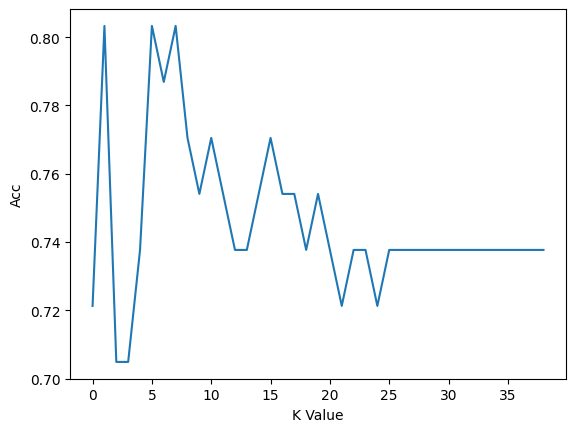

In [224]:
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

In [225]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8032786885245902

In [226]:
data = pd.read_csv('heart.csv')

In [227]:
data = data.drop_duplicates()

In [228]:
X = data.drop('target',axis=1)
y=data['target']

In [229]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,
                                                random_state=42)

In [230]:
from sklearn.tree import DecisionTreeClassifier

In [231]:
dt = DecisionTreeClassifier()


In [232]:
dt.fit(X_train,y_train)


DecisionTreeClassifier()

In [233]:
DecisionTreeClassifier()


DecisionTreeClassifier()

In [234]:
y_pred4= dt.predict(X_test)


In [235]:
accuracy_score(y_test,y_pred4)


0.7213114754098361

In [236]:
from sklearn.ensemble import RandomForestClassifier


In [237]:
rf = RandomForestClassifier()


In [238]:
rf.fit(X_train,y_train)


RandomForestClassifier()

In [239]:
y_pred5= rf.predict(X_test)


In [240]:
accuracy_score(y_test,y_pred5)


0.8360655737704918

In [241]:
from sklearn.ensemble import GradientBoostingClassifier


In [242]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF'],
                          'ACC':[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred3)*100,
                                accuracy_score(y_test,y_pred4)*100,
                                accuracy_score(y_test,y_pred5)*100]})

In [243]:
final_data


,Models,ACC
0,LR,78.688525
1,SVM,80.327869
2,KNN,73.770492
3,DT,72.131148
4,RF,83.606557


In [244]:
import seaborn as sns


<Axes: xlabel='Models', ylabel='ACC'>

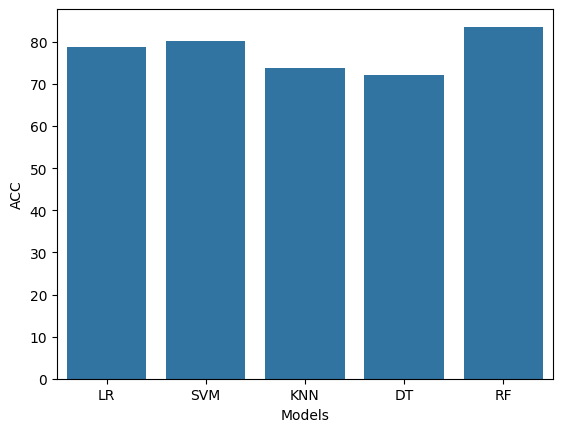

In [245]:
sns.barplot(x = "Models", y = "ACC", data = final_data)


In [246]:
X=data.drop('target',axis=1)
y=data['target']

In [247]:
from sklearn.ensemble import RandomForestClassifier


In [248]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [249]:
import pandas as pd

In [250]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
     'slope':2,
    'ca':2,
    'thal':3,    
},index=[0])

In [251]:
new_data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [252]:
p = rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


In [253]:
import joblib

In [254]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [255]:
model = joblib.load('model_joblib_heart')


In [256]:
model.predict(new_data)

array([0], dtype=int64)

In [257]:
from tkinter import *
import joblib

In [258]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

In [259]:
#cross validation for rf
X=data.drop('target',axis=1)
y=data['target']
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X,y)
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Generate instances of KFold and the Random Forest classifier
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
rf = RandomForestClassifier()

# Train the Random Forest Model w/ Kfold cross validation and get the scores
results = cross_val_score(rf, X, y, cv=kfold)
mean_accuracy = results.mean() * 100.0
std_accuracy = results.std() * 100.0

print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)


Mean Accuracy: 82.76344086021504
Standard Deviation of Accuracy: 9.264431514874035


In [260]:
#auc
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Generate instances of KFold and the Random Forest classifier
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
rf = RandomForestClassifier()

# Train the Random Forest Model w/ Kfold cross-validation and get the scores
results = cross_val_score(rf, X, y, cv=kfold, scoring='roc_auc')

print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))


AUC: 0.892 (0.077)


In [261]:
data = pd.read_csv('heart.csv')
data = data.drop_duplicates()
X = data.drop('target',axis=1)
y=data['target']

In [262]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,
                                                random_state=42)


In [263]:
#calculating acc, precision, recall, f1 for all
import warnings
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

def model_cross_val_score(model_dict, X, y, cv=10):
    """
    Cross Validation for Models in Model Dict...
    Providing Mean value of cross validation for each Parameter
    
    Parameters:
    - model_dict : Model Dictionary with/without parameter tuning
    - X : Feature Data
    - y : Target Data
    - cv : Cross Validation folds (Default = 5)
    """
    warnings.filterwarnings("ignore")
    
    scoring_param = ["accuracy", "precision", "recall", "f1_micro", "f1_macro"]
    
    cv_score = {} # To append Scores of each Model
    
    np.random.seed(42)
    for name, model in model_dict.items():
        cv_score[name] = {}
        for param in scoring_param:
            # Calculating Mean values for cross validation with each Parameter
            score = np.mean(cross_val_score(model, X, y, scoring=param, cv=cv))
            cv_score[name][param] = score 
    cv = pd.DataFrame(data=cv_score)
    return cv

# Define models
lr_model = LogisticRegression()
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()
svm_model = SVC()

# Create a dictionary of models
model_dict = {
    "Logistic_Regression": lr_model,
    "KNN_Classifier": knn_model,
    "Random_Forest": rf_model,
    "Decision_Tree": dt_model,
    "SVM": svm_model
}

# Now, use the model_cross_val_score function with the updated model_dict
# Assuming X and y are already defined
# Call the model_cross_val_score function
cv_results = model_cross_val_score(model_dict, X, y)

# Print the cross-validation results
print(cv_results)



           Logistic_Regression  KNN_Classifier  Random_Forest  Decision_Tree  \
accuracy              0.837634        0.649462       0.831075       0.794839   
precision             0.823211        0.662992       0.837544       0.829432   
recall                0.897426        0.722059       0.860294       0.829779   
f1_micro              0.837634        0.649462       0.827742       0.798172   
f1_macro              0.834073        0.641260       0.837942       0.783658   

                SVM  
accuracy   0.655484  
precision  0.645998  
recall     0.817279  
f1_micro   0.655484  
f1_macro   0.632966  


[[14 18]
 [ 4 25]]


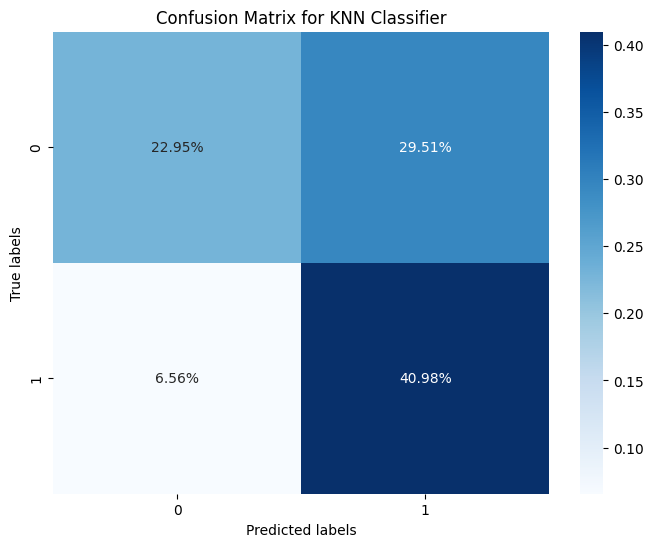

In [266]:
# Assuming you have already trained your KNN model and have X_train and y_train
knn_model.fit(X_train, y_train)

# Now you can make predictions on the test data
knn_pred_y = knn_model.predict(X_test)

# Calculate the confusion matrix
knn_matrix = confusion_matrix(y_test, knn_pred_y)
print(knn_matrix)  # Print the confusion matrix for reference

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(knn_matrix/np.sum(knn_matrix), fmt='.2%', annot=True, cmap='Blues')
plt.title('Confusion Matrix for KNN Classifier')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


[[12 20]
 [ 5 24]]


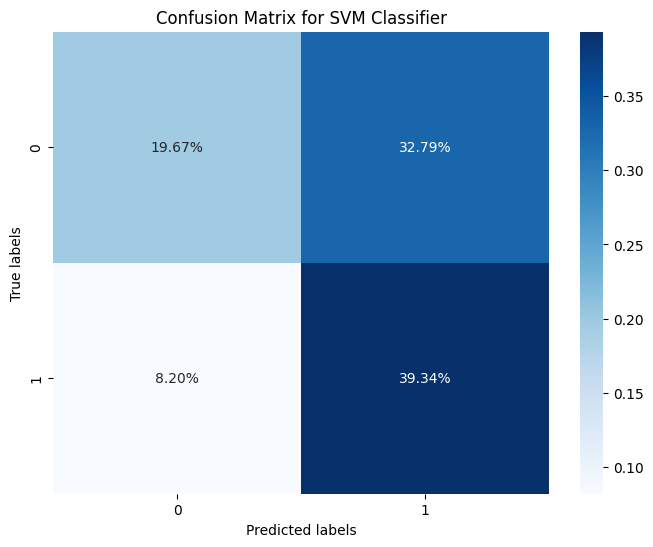

In [267]:
# Assuming you have training data X_train and corresponding labels y_train
svm_model.fit(X_train, y_train)

# Now you can make predictions on the test data
svm_pred_y = svm_model.predict(X_test)

# Calculate the confusion matrix
svm_matrix = confusion_matrix(y_test, svm_pred_y)
print(svm_matrix)  # Print the confusion matrix for reference

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(svm_matrix/np.sum(svm_matrix), fmt='.2%', annot=True, cmap='Blues')
plt.title('Confusion Matrix for SVM Classifier')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


[[24  8]
 [ 9 20]]


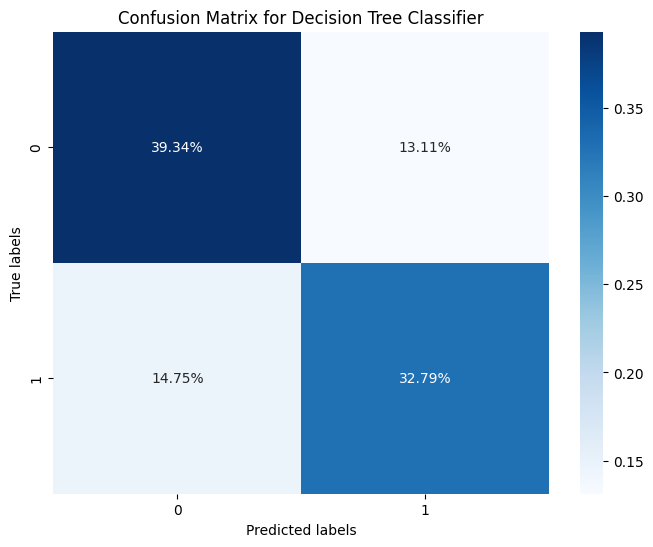

In [268]:
# Assuming you have training data X_train and corresponding labels y_train
dt_model.fit(X_train, y_train)

# Now you can make predictions on the test data
dt_pred_y = dt_model.predict(X_test)

# Calculate the confusion matrix
dt_matrix = confusion_matrix(y_test, dt_pred_y)
print(dt_matrix)  # Print the confusion matrix for reference

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(dt_matrix/np.sum(dt_matrix), fmt='.2%', annot=True, cmap='Blues')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


[[22 10]
 [ 2 27]]


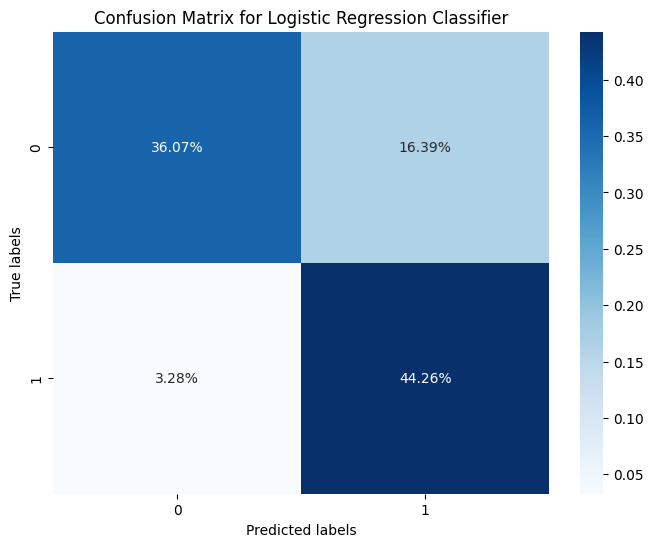

In [269]:
# Assuming you have training data X_train and corresponding labels y_train
lr_model.fit(X_train, y_train)

# Now you can make predictions on the test data
lr_pred_y = lr_model.predict(X_test)

# Calculate the confusion matrix
lr_matrix = confusion_matrix(y_test, lr_pred_y)
print(lr_matrix)  # Print the confusion matrix for reference

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(lr_matrix/np.sum(lr_matrix), fmt='.2%', annot=True, cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()



[[25  7]
 [ 3 26]]


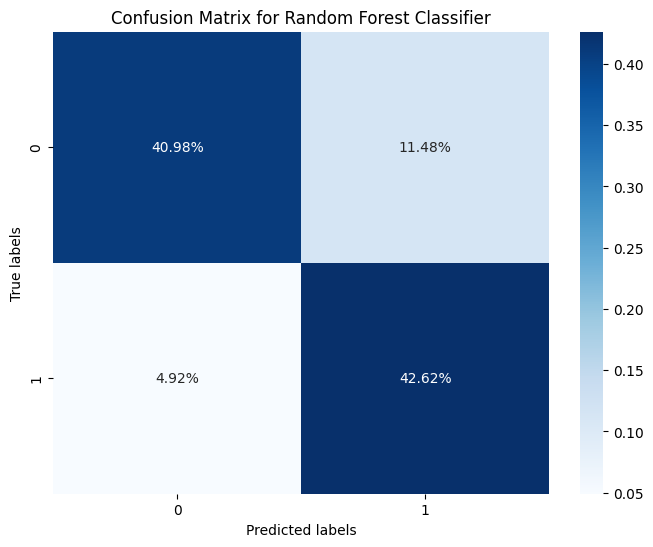

In [270]:
# Assuming you have training data X_train and corresponding labels y_train
rf_model.fit(X_train, y_train)

# Now you can make predictions on the test data
rf_pred_y = rf_model.predict(X_test)

# Calculate the confusion matrix
rf_matrix = confusion_matrix(y_test, rf_pred_y)
print(rf_matrix)  # Print the confusion matrix for reference

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rf_matrix/np.sum(rf_matrix), fmt='.2%', annot=True, cmap='Blues')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()
